# Prepare Data

In [145]:
#100 2-D points distributed across 10 clusters

import random
from sklearn.datasets import make_blobs
num_clusters = 10
cluster_std_dev = 4
points, cluster_ids, centers = make_blobs(n_samples=500, centers=num_clusters, n_features=2, cluster_std=cluster_std_dev, center_box=(0,100), return_centers=True)
data = list(map(tuple, points))
xs = [x[0] for x in data]
ys = [x[1] for x in data]

# Visualize Data

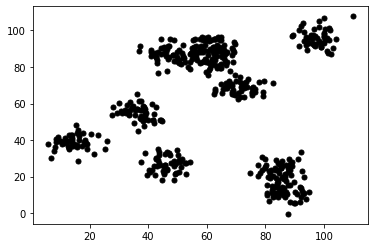

In [146]:
import matplotlib.pyplot as plt
plt.scatter(xs, ys, s=25, color='black', label="Images")

# Sample Subset 1

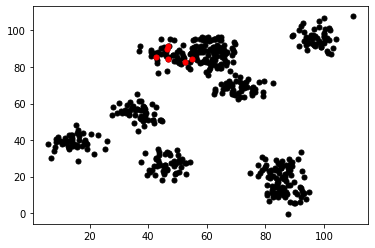

In [147]:
# get 6 data points belonging to cluster#1
cluster1Indices = [index for index, val in enumerate(cluster_ids) if val == 1]
subset1 = random.sample(cluster1Indices, 6)
subset1xs = [xs[x] for x in subset1]
subset1ys = [ys[x] for x in subset1]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(subset1xs, subset1ys, s=25, color='red', label="Subset1")
set1 = set(subset1[:-1])

# Sample Subset 2

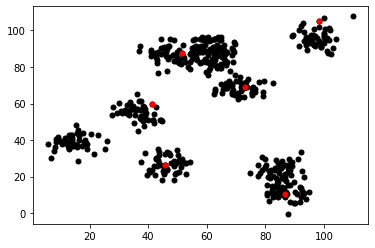

In [148]:
# get 6 data points belonging to different clusters
subset2 = []
for i in range(6):
    #find the index of first point that belongs to cluster i
    diverse_index = cluster_ids.tolist().index(i)
    subset2.append(diverse_index)
subset2xs = [xs[x] for x in subset2]
subset2ys = [ys[x] for x in subset2]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(subset2xs, subset2ys, s=25, color='red', label="Subset2")
set2 = set(subset2[:-1])

# Facility Location

In [149]:
from submodlib.functions.facilityLocation import FacilityLocationFunction

## Provide data, similarity kernel is internally created in C++

Time taken by instantiation = 0.567360335999993
Subset 1's FL value = 21.270719528198242
Subset 2's FL value = 33.25899124145508
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.1732128858566284
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 2.185729503631592
Time taken by maximization = 0.051949899999996774


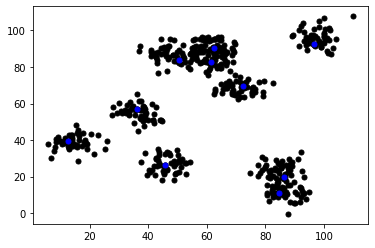

In [150]:
import time
dataArray = np.array(data)
start = time.process_time()
obj1 = FacilityLocationFunction(n=500, data=dataArray, mode="dense", metric="euclidean")
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj1.evaluate(set1)}")
print(f"Subset 2's FL value = {obj1.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj1.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj1.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj1.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

## Create similarity kernel in Python and provide to FL

Time taken by instantiation = 1.8557999110000054
Subset 1's FL value = 21.27071189880371
Subset 2's FL value = 33.25899887084961
Gain of adding another point of same cluster (157) to {35, 204, 472, 25, 319} = 1.1732145547866821
Gain of adding another point of different cluster (3) to {35, 204, 472, 25, 319} = 2.18572998046875
Time taken by maximization = 0.04711514999999622


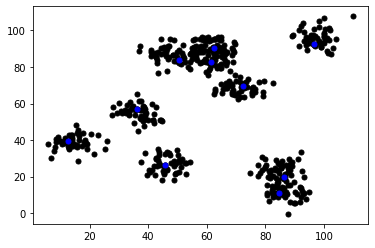

In [151]:
from submodlib.helper import create_kernel
start = time.process_time()
_, K_dense = create_kernel(dataArray, 'dense','euclidean')
obj2 = FacilityLocationFunction(n=500, sijs = K_dense)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj2.evaluate(set1)}")
print(f"Subset 2's FL value = {obj2.evaluate(set2)}")
print(f"Gain of adding another point of same cluster ({subset1[-1]}) to {set1} = {obj2.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point of different cluster ({subset2[-1]}) to {set1} = {obj2.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj2.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

## Faster sparse kernel alternative for both flavors

### Provide data, sparse similarity kernel is internally created in C++

Time taken by instantiation = 0.08096334299999342
Subset 1's FL value = 17.750364303588867
Subset 2's FL value = 21.4576473236084
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.137498378753662
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 1.7260504961013794
Time taken by maximization = 0.16734668800000918


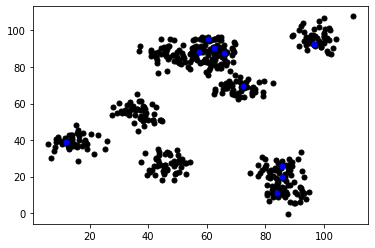

In [152]:
start = time.process_time()
obj3 = FacilityLocationFunction(n=500, data=dataArray, mode="sparse", metric="euclidean", num_neigh=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj3.evaluate(set1)}")
print(f"Subset 2's FL value = {obj3.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj3.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj3.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj3.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

### Create sparse similarity kernel in Python and provide to FL

Time taken by instantiation = 0.3970655230000091
Subset 1's FL value = 17.750362396240234
Subset 2's FL value = 21.4576473236084
Gain of adding another point of same cluster (157) to {35, 204, 472, 25, 319} = 1.1374998092651367
Gain of adding another point of different cluster (3) to {35, 204, 472, 25, 319} = 1.726050853729248
Time taken by maximization = 0.1621273570000028


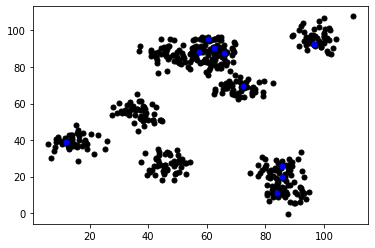

In [153]:
#from submodlib.helper import create_kernel
start = time.process_time()
_, K_sparse = create_kernel(dataArray, 'sparse','euclidean', num_neigh=10)
obj4 = FacilityLocationFunction(n=500, sijs = K_sparse, num_neigh=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj4.evaluate(set1)}")
print(f"Subset 2's FL value = {obj4.evaluate(set2)}")
print(f"Gain of adding another point of same cluster ({subset1[-1]}) to {set1} = {obj4.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point of different cluster ({subset2[-1]}) to {set1} = {obj4.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj4.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

## Alternative Clustered Implementations

### Clustered mode in FacilityLocation

#### Provide data, clustering is done internally

Time taken by instantiation = 1.4845231440000077
Subset 1's FL value = 18.39162826538086
Subset 2's FL value = 31.58841896057129
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.1374998092651367
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 2.18572998046875
Time taken by maximization = 0.0374062979999934


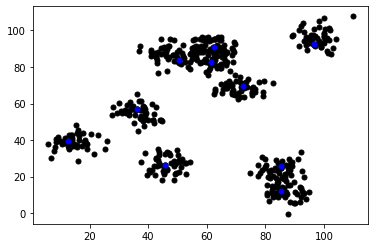

In [154]:
start = time.process_time()
obj5 = FacilityLocationFunction(n=500, data=dataArray, mode="clustered", metric="euclidean", num_cluster=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj5.evaluate(set1)}")
print(f"Subset 2's FL value = {obj5.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj5.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj5.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj5.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### Provide clustering

In [159]:
type(cluster_ids.tolist())

list

Time taken by instantiation = 1.0299300239999951
Subset 1's FL value = 17.101604461669922
Subset 2's FL value = 31.777019500732422
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.166602611541748
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 2.18572998046875
Time taken by maximization = 0.03698035700000446


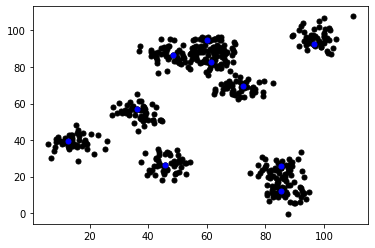

In [160]:
start = time.process_time()
obj6 = FacilityLocationFunction(n=500, data=dataArray, cluster_lab=cluster_ids.tolist(), mode="clustered", metric="euclidean", num_cluster=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj6.evaluate(set1)}")
print(f"Subset 2's FL value = {obj6.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj6.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj6.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj6.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

### Using ClusteredFunction

In [161]:
from submodlib import ClusteredFunction

#### Provide data, clustering is done internally

Time taken by instantiation = 1.4624118710000005
Subset 1's FL value = 18.39162826538086
Subset 2's FL value = 31.58843231201172
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.1374998092651367
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 0.0
Time taken by maximization = 1.1623544369999905


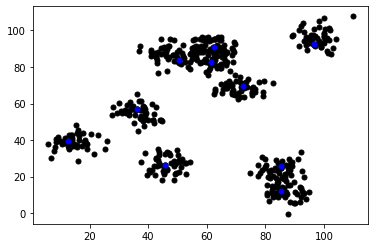

In [162]:
start = time.process_time()
obj7 = ClusteredFunction(n=500, f_name='FacilityLocation', metric='euclidean', data=dataArray, num_cluster=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj7.evaluate(set1)}")
print(f"Subset 2's FL value = {obj7.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj7.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj7.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj7.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")

#### Provide clustering

Time taken by instantiation = 1.0835193229999902
Subset 1's FL value = 17.101604461669922
Subset 2's FL value = 31.777023315429688
Gain of adding another point (157) of same cluster to {35, 204, 472, 25, 319} = 1.166602611541748
Gain of adding another point (3) of different cluster to {35, 204, 472, 25, 319} = 0.0
Time taken by maximization = 1.1622379920000014


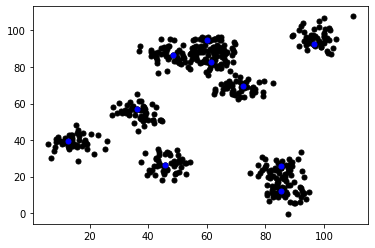

In [163]:
start = time.process_time()
obj8 = ClusteredFunction(n=500, f_name='FacilityLocation', metric='euclidean', data=dataArray, cluster_lab=cluster_ids.tolist(), num_cluster=10)
print(f"Time taken by instantiation = {time.process_time() - start}")
print(f"Subset 1's FL value = {obj8.evaluate(set1)}")
print(f"Subset 2's FL value = {obj8.evaluate(set2)}")
print(f"Gain of adding another point ({subset1[-1]}) of same cluster to {set1} = {obj8.marginalGain(set1, subset1[-1])}")
print(f"Gain of adding another point ({subset2[-1]}) of different cluster to {set1} = {obj8.marginalGain(set1, subset2[-1])}")
start = time.process_time()
greedyList = obj8.maximize(10,'NaiveGreedy', False, False, False)
print(f"Time taken by maximization = {time.process_time() - start}")
greedyXs = [xs[x[0]] for x in greedyList]
greedyYs = [ys[x[0]] for x in greedyList]
plt.scatter(xs, ys, s=25, color='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=25, color='blue', label="Greedy Set")